In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

In [99]:
from types import SimpleNamespace
from copy import deepcopy
import time
import numpy as np
from scipy import optimize
from scipy import interpolate

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

To derive the Cournot-Nash equilibrium, we will focus on the example of a duopoly. That is, there are only two firms in the market. We will assume that firms 1 and 2 both produce the same good at the same production cost c1 = c2 = c. 

We assume demand is a linear function given by p(x) = a - bx where a > 0 and b > 0. If one firm produces x1 and the other produces x2, then the total market quantity is x = x1 + x2. So, we can substitute this expression for x in the following equations. Firm 1's total revenue r1 is then given by the market price times the quantity produced:

$$
\begin{aligned}
x&=x_{1}+x_{2}\\ p&=a-bx\\
r_{1}&=px_{1}\\&=(a-b(x_{1}+x_{2}))x_{1}\\ 
\end{aligned} 
$$
※analogous for firm 2

and firms 1's total profits π1 are calculated as the difference between revenue and production costs: 
$$
\begin{aligned}
π_{1} &= px_{1}-cx_{1} \\&= (a-bx)x_{1}-cx_{1} \\&= [a-b(x_{1}+x_{2})]x_{1}-cx_{1} \\&=-bx_{1}^2-bx_{1}x_{2}+(a-c)x_{1}\\
\end{aligned}
$$
※analogous for firm 2

Each firm then chooses the production quantity that maximizes its profits, taking the quantity produced by its competitor into consideration. So, to derive the optimal output, we need to find the quantity q1 that maximizes the profit function for firm 1, taking q2 as given. Analogously, we will do the same for firm 2. To find the optimum, we take the partial derivative of the profit function and set that equation equal to 0:
$$
\max_{x1}[π(x_{1})=-bx_{1}^2-bx_{1}x_{2}+(a-c)x_{1}]\\
\frac{d}{d\Delta x_{1}} π(x_{1}) = 0 \Leftrightarrow −2bx_{1}−bx_{2} +(a−c)=0\\
x_{1}^* = -\frac{1}{2}x_{2}+\frac{a-c}{2b}  \\
$$
and analogously 
$$
\begin{aligned}
x_{2}^* = -\frac{1}{2}x_{1}+\frac{a-c}{2b}
\end{aligned}
$$

The equations x1* and x2* are called the best response functions. They tell us firm 1's optimal output for any quantity produced by firm 2, and firm 2's optimal output for any quantity produced by firm 1.  

In the Cournot-Nash equilibrium, both firms will give their best response to each other's actions. To derive the equilibrium, we thus insert the optimal response of firm 2 into firm 1’s equation to calculate its optimal quantity, and vice versa: 

$$
\begin{aligned}
x_{1} &= -\frac{1}{2}(-\frac{1}{2}x_{1}+\frac{a-c}{2b})+\frac{a-c}{2b}\\x_{1}^* &= \frac{a-c}{3b}
\end{aligned}
$$
and analogously
$$
\begin{aligned}
x_{2}^* &= \frac{a-c}{3b}=x_{1}^*
\end{aligned}
$$


This is the unique Nash equilibrium for the Cournot duopoly. Entering the optimal quantities into the demand function gives us the total quantity x* and the market price p* in the equilibrium:


$$
\begin{aligned}
x^* &= x_{1}^*+x_{2}^* &=\frac{2}{3}\left[\frac{a-c}{3b}\right]\\
p^*&=a-bx*\\&=\frac{a+2b}{3}
\end{aligned}
$$

In this condition, firm 1's profits π1 is:
$$
\begin{aligned}
π_{1} &= p^*x_{1}-cx_{1} &= (p^*-c)x_{1}\\&= \frac{(a-c)^2}{9b}
\end{aligned}
$$
and analogously
$$
\begin{aligned}
π_{2} = \frac{(a-c)^2}{9b} = π_{1}
\end{aligned}
$$

# Analytical solution

In [16]:
x = sm.symbols('x')
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
π1 = sm.symbols('π_1')
π2 = sm.symbols('π_2')
p = sm.symbols('p')
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')


In [79]:
objective = p*x1 - c*x1
price = sm.Eq(a-b*x,p)
quantity = sm.Eq(x1+x2,x)
p_from_pri = sm.solve(price, p)
x_from_pri = sm.solve(quantity, x)
objective_subs1 = objective.subs(p, p_from_pri[0])
objective_subs2 = objective_subs1.subs(x, x_from_pri[0])
foc = sm.diff(objective_subs2, x1)
sol = sm.solve(sm.Eq(foc,0), x1)
sol[0]

(a - b*x_2 - c)/(2*b)

In [73]:
objective_2 = p*x2 - c*x2
objective_subs3 = objective_2.subs(p, p_from_pri[0])
objective_subs4 = objective_subs3.subs(x, x_from_pri[0])
foc_2 = sm.diff(objective_subs4, x2)
sol_2 = sm.solve(sm.Eq(foc_2,0), x2)
sol_2[0]

(a - b*x_1 - c)/(2*b)

In [88]:
quantity_x1 = sm.Eq((a-b*x2-c)/(2*b),x1)
quantity_x2 = sm.Eq((a-b*x1-c)/(2*b),x2)
x2_from_qua = sm.solve(quantity_x2, x2)
objective_subs5 = quantity_x1.subs(x2, x2_from_qua[0])
sol_x1 = sm.solve(objective_subs5, x1)
sol_x1[0]


(a - c)/(3*b)

In [89]:
x1_from_qua = sm.solve(quantity_x1, x1)
objective_subs6 = quantity_x2.subs(x1, x1_from_qua[0])
sol_x2 = sm.solve(objective_subs6, x2)
sol_x2[0]

(a - c)/(3*b)

In [97]:
sol_x1_func = sm.lambdify(args = (a,b,c), expr = sol_x1[0])
sol_x2_func = sm.lambdify(args = (a,b,c), expr = sol_x2[0])

a_vec = np.array([1.2,3,5,9])
b_val = 0.5
c_val = 0.5

best_response_a = sol_x1_func(a_vec, b_val, c_val)
for d in best_response_a:
    print(f'best response x1(x2): {d:1.3f}')

best response x1(x2): 0.467
best response x1(x2): 1.667
best response x1(x2): 3.000
best response x1(x2): 5.667


# Numerical solution

Cournot-Nash equilibrium: q1 = 1.333, q2 = 1.333
Profits at Cournot-Nash equilibrium: π1 = 4.889, π2 = 4.889


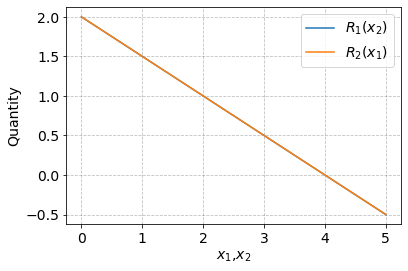

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
a = 10
b = 2
c = 1

# Define the inverse demand function
def p(x):
    return a - b*x

# Define the profit functions
def π1(x1,x2):
    return (p(x1+x2) - c)*x1

def π2(x1,x2):
    return (p(x1+x2) - c)*x2

# Define a function to find the Cournot-Nash equilibrium
def cournot_nash(x1_guess, x2_guess):
    error = 1
    while error > 1e-6:
        x1_new = (a - 2*c - b*x2_guess)/(2*b)
        x2_new = (a - 2*c - b*x1_guess)/(2*b)
        error = max(abs(x1_new - x1_guess), abs(x2_new - x2_guess))
        x1_guess, x2_guess = x1_new, x2_new
    return x1_guess, x2_guess

# Find the Cournot-Nash equilibrium
x1_star, x2_star = cournot_nash(1, 1)

# Compute the profits at the Cournot-Nash equilibrium
π1_star = π1(x1_star, x2_star)
π2_star = π2(x1_star, x2_star)

# Print the results
print(f"Cournot-Nash equilibrium: q1 = {x1_star:.3f}, q2 = {x2_star:.3f}")
print(f"Profits at Cournot-Nash equilibrium: π1 = {π1_star:.3f}, π2 = {π2_star:.3f}")

# Plot the reaction functions
x1_vals = np.linspace(0,5,100)
x2_vals = np.linspace(0,5,100)

plt.plot(x1_vals, (a-2*c-b*x2_vals)/(2*b), label='$R_1(x_2)$')
plt.plot(x2_vals, (a-2*c-b*x1_vals)/(2*b), label='$R_2(x_1)$')
plt.xlabel('$x_1$,$x_2$')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [100]:
f = lambda a: (2(a-c)**2)/(9*b)

G = np.linspace(-5,10,6)
F = f(G)

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-100-db982d01fe17>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  f = lambda a: (2(a-c)**2)/(9*b)


TypeError: 'int' object is not callable

In [ ]:
grid = np.linspace(-7,12,500) # 500 makes it "fine"
F_true = f(grid)